# Results visualization

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
plt.style.use('seaborn-notebook')
plt.rcParams["axes.grid"] = False

In [3]:
df = pd.read_csv('en_disaster.csv', index_col=0)

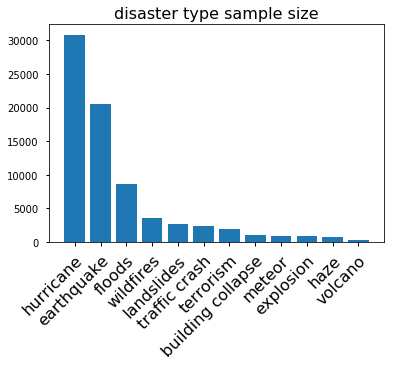

In [6]:
all_events = dict(df.event_coarse.value_counts())
n_types=len(all_events)
fig, ax=plt.subplots()
disaster, count = zip(*[(i, k) for i,k in all_events.items()])
ax.bar(disaster, count)
plt.title('disaster type sample size', size=16)
plt.setp(ax.get_xticklabels(), size=16, rotation=45, ha="right",
             rotation_mode="anchor")
plt.show()

## Compare precison, recall and F-1 scores for the 4 models

In [21]:
precision = {'baseline':[0.82, 0.66, 0.68, 0.71, 0.48, 0.36, 0.35],
             'BERT': [0.87, 0.67, 0.67, 0.66, 0.54, 0.45, 0.37],
             'BERT+NL': [0.83, 0.64, 0.66, 0.69, 0.49, 0.51, 0.42],
             'BERT+LSTM': [0.89, 0.64, 0.66, 0.69, 0.53, 0.46, 0.42],
             'BERT+CNN': [0.80, 0.70, 0.65, 0.74, 0.50, 0.44, 0.43]}
recall = {'baseline':[0.63, 0.49, 0.75, 0.77, 0.73, 0.76, 0.66],
             'BERT': [0.64, 0.53, 0.79, 0.87, 0.78, 0.73, 0.64],
             'BERT+NL': [0.69, 0.54, 0.78, 0.83, 0.80, 0.64, 0.48],
             'BERT+LSTM': [0.62, 0.60, 0.81, 0.80, 0.76, 0.69, 0.61],
             'BERT+CNN': [0.70, 0.50, 0.80, 0.81, 0.74, 0.72, 0.58]}  
f1 = {'baseline':[0.71, 0.56, 0.71, 0.74, 0.58, 0.49, 0.46],
             'BERT': [0.74, 0.59, 0.73, 0.75, 0.64, 0.56, 0.47],
             'BERT+NL': [0.75, 0.59, 0.71, 0.75, 0.61, 0.57, 0.44],
             'BERT+LSTM': [0.73, 0.62, 0.73, 0.74, 0.62, 0.55, 0.49],
             'BERT+CNN': [0.74, 0.58, 0.71, 0.77, 0.60, 0.54, 0.50]}  

In [9]:
total_scores = []
for k in ['baseline', 'BERT', 'BERT+NL', 'BERT+LSTM', 'BERT+CNN']:
    total_scores.extend(precision[k])
    total_scores.extend(recall[k])
    total_scores.extend(f1[k])

min_score = min(total_scores)
max_score = max(total_scores)

In [10]:
def model_performance(metric, name):
    label_name = ['not related or not informative', 'other useful information', 'donations and volunteering',
              'affected individuals', 'sympathy and support', 'infrastructure and utilities damage',
              'caution and advice']
    model = ['baseline', 'BERT', 'BERT+NL', 'BERT+LSTM', 'BERT+CNN']
    fig, ax=plt.subplots(figsize=(8, 12))
    m = np.array([metric['baseline'], metric['BERT'], metric['BERT+NL'], metric['BERT+LSTM'],  metric['BERT+CNN']])
    im=ax.imshow(m, cmap='Blues', vmin=min_score, vmax=max_score)
#     ax.figure.colorbar(im, ax=ax)
    ax.set_xlabel('class', size=12)
    ax.set_ylabel('model', size=12)
    ax.set_yticks(range(0,m.shape[0]))
    ax.set_xticks(range(0,m.shape[1]))
    ax.set_yticklabels(model)
    ax.set_xticklabels(label_name)
    plt.setp(ax.get_xticklabels(), size=12, rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), size=12)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            ax.text(j, i, format(m[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if m[i, j] > (max_score+min_score)/2. else "black")
    fig.tight_layout()
    ax.set_title(name, size=12)
    plt.show()

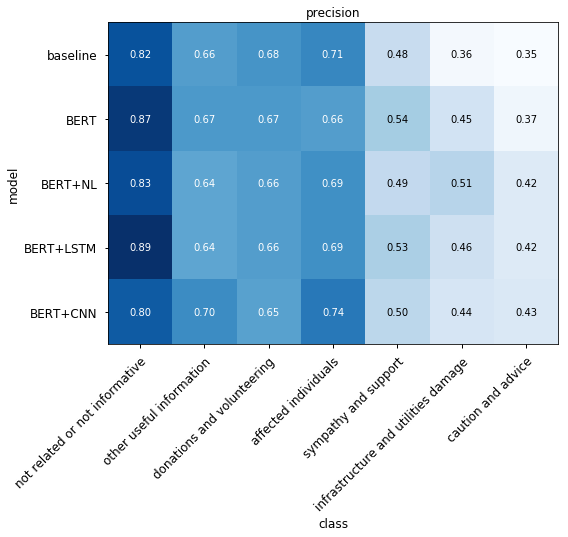

In [11]:
model_performance(precision, 'precision')

In [12]:
print('precision:')
print ('BERT outperforms baseline by: %.2f' % ((sum(precision['BERT'])-sum(precision['baseline']))/7*100))
print ('BERT+NL outperforms baseline by: %.2f' % ((sum(precision['BERT+NL'])-sum(precision['baseline']))/7*100))
print ('BERT+LSTM outperforms baseline by: %.2f' % ((sum(precision['BERT+LSTM'])-sum(precision['baseline']))/7*100))
print ('BERT+CNN outperforms baseline by: %.2f' % ((sum(precision['BERT+CNN'])-sum(precision['baseline']))/7*100))

precision:
BERT outperforms baseline by: 2.43
BERT+NL outperforms baseline by: 2.57
BERT+LSTM outperforms baseline by: 3.29
BERT+CNN outperforms baseline by: 2.86


In [18]:
print('precision:')
print ('baseline: %.2f' % ((sum(precision['baseline']))/7*100))
print ('BERT: %.2f' % ((sum(precision['BERT']))/7*100))
print ('BERT+NL: %.2f' % ((sum(precision['BERT+NL']))/7*100))
print ('BERT+LSTM: %.2f' % ((sum(precision['BERT+LSTM']))/7*100))
print ('BERT+CNN: %.2f' % ((sum(precision['BERT+CNN']))/7*100))

precision:
baseline: 58.00
BERT: 60.43
BERT+NL: 60.57
BERT+LSTM: 61.29
BERT+CNN: 60.86


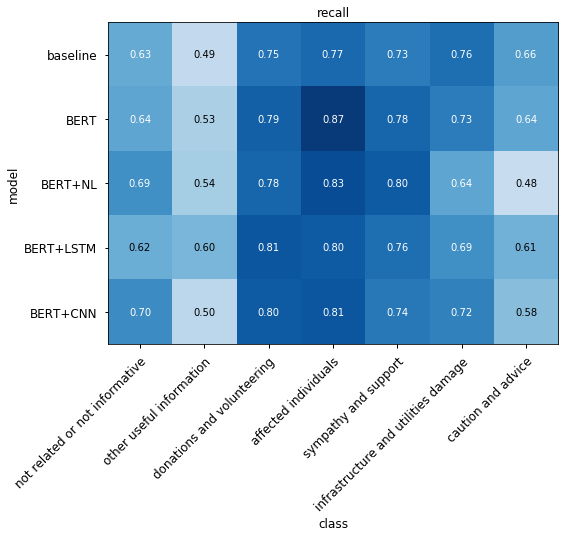

In [13]:
model_performance(recall, 'recall')

In [14]:
print('recall:')
print ('BERT outperforms baseline by: %.2f' % ((sum(recall['BERT'])-sum(recall['baseline']))/7*100))
print ('BERT+NL outperforms baseline by: %.2f' % ((sum(recall['BERT+NL'])-sum(recall['baseline']))/7*100))
print ('BERT+LSTM outperforms baseline by: %.2f' % ((sum(recall['BERT+LSTM'])-sum(recall['baseline']))/7*100))
print ('BERT+CNN outperforms baseline by: %.2f' % ((sum(recall['BERT+CNN'])-sum(recall['baseline']))/7*100))

recall:
BERT outperforms baseline by: 2.71
BERT+NL outperforms baseline by: -0.43
BERT+LSTM outperforms baseline by: 1.43
BERT+CNN outperforms baseline by: 0.86


In [26]:
print('recall:')
print ('baseline: %.2f' % (sum(recall['baseline'])/7*100))
print ('BERT: %.2f' % ((sum(recall['BERT']))/7*100))
print ('BERT+NL: %.2f' % ((sum(recall['BERT+NL']))/7*100))
print ('BERT+LSTM: %.2f' % ((sum(recall['BERT+LSTM']))/7*100))
print ('BERT+CNN: %.2f' % ((sum(recall['BERT+CNN']))/7*100))

recall:
baseline: 68.43
BERT: 71.14
BERT+NL: 68.00
BERT+LSTM: 69.86
BERT+CNN: 69.29


In [25]:
sum([0.63, 0.49, 0.75, 0.77, 0.73, 0.76, 0.66])

4.79

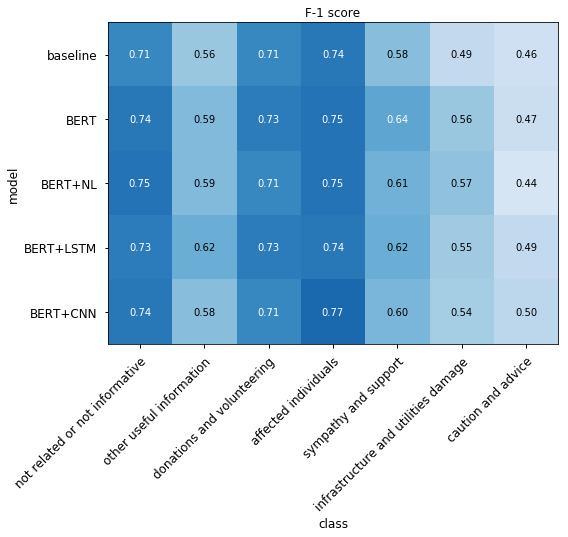

In [15]:
model_performance(f1, 'F-1 score')

In [16]:
print('F-1 score:')
print ('BERT outperforms baseline by: %.2f' % ((sum(f1['BERT'])-sum(f1['baseline']))/7*100))
print ('BERT+NL outperforms baseline by: %.2f' % ((sum(f1['BERT+NL'])-sum(f1['baseline']))/7*100))
print ('BERT+LSTM outperforms baseline by: %.2f' % ((sum(f1['BERT+LSTM'])-sum(f1['baseline']))/7*100))
print ('BERT+CNN outperforms baseline by: %.2f' % ((sum(f1['BERT+CNN'])-sum(f1['baseline']))/7*100))

F-1 score:
BERT outperforms baseline by: 3.29
BERT+NL outperforms baseline by: 2.43
BERT+LSTM outperforms baseline by: 3.29
BERT+CNN outperforms baseline by: 2.71


In [27]:
print('F-1 score:')
print ('baseline: %.2f' % (sum(f1['baseline'])/7*100))
print ('BERT: %.2f' % ((sum(f1['BERT']))/7*100))
print ('BERT+NL: %.2f' % ((sum(f1['BERT+NL']))/7*100))
print ('BERT+LSTM: %.2f' % ((sum(f1['BERT+LSTM']))/7*100))
print ('BERT+CNN: %.2f' % ((sum(f1['BERT+CNN']))/7*100))

F-1 score:
baseline: 60.71
BERT: 64.00
BERT+NL: 63.14
BERT+LSTM: 64.00
BERT+CNN: 63.43


## Error analysis

Use default BERT in this analysis

<img src='error_analysis_matrix.png'>

1. Some are really misclassified, ambiguous, or not constrainted to 1 category. Informativeness are subjective.
2. Some need more contexts to fully understand, e.g. html.
3. Non-ascii words and emoji missing
4. Semantic misconstrue (Sarcastic, metaphoric...)
5. Keyword influence. 
6. Some events may not really happen.
7. Misleading hashtag (#)
8. Message too short
9. Internet slang, mispelling
10. a lot of misclassified messages are news
11. rare cases

In [39]:
df_test = pd.read_csv('model_output/data/df_test.csv', index_col=0)
df_test = df_test.sort_values(by='ProcessedText_BERTbase_length', ascending=False)
BERT_pred = pickle.load(open('model_output/default_bert-base-uncased_test_prediction','rb'))

In [73]:
true_label = df_test.InformationType_coarse.values

### True: not related or not informative ; Pred: other useful information

In [74]:
list(df_test.TweetText[(np.array(BERT_pred)=='other useful information')&(true_label=='not related or not informative')])

['#terremoto M 4.6, Vanuatu - Friday, September  7, 2012 00:52:42 UTCFriday, September  7, 2012 11:52:42 AM at epicent... http://t.co/DHpCyyRZ',
 'RT @PMOnAir: PM says Roxon wanted out 1yr ago but waited till the time is right. So, #QLDFloods is the best time to change Min for Emerg ...',
 '#Earthquake MagnitudeÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa0mb 4.7RegionÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa0OFFSHORE MAULE, CHILEDate timeÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa02012-09-15   00:40:15.2 UTCLocationÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa034.65 ... http://t.co/LTd1cuxo',
 'Dana Sauchelli of the #NewYork Post @nypost dares to report on #antiWhite terror in #NYC http://t.co/keez5qECVj #RedOctober #ARIACWFAW',
 'Relief as Typhoon Hagupit spares Tacloban, passes north - CNN: CNNRelief as Typhoon Hagupit ... http://t.co/dt3ryh8Hxr G #Malaysia #News',
 '[VIDEO] #FOI, #RHbill, #PabloPH and more: The most important stories only on the Rappler Newscast, December 3, 2012 http://t.co/B4X8sB2

1. Short time lapse video from James Reynolds of EarthUncutTV as typhoon Ruby (Hagupit) approaches Calbayog City,... http://t.co/JiYbXJBzHu (1)
2. The Bay Area media is going a little over board with this Napa earthquake. Do we really need updates every 15 minutes? (4)
3. Prayers to all affected by Irma, Maria and the Mexico earthquake! Mother Nature seems pissed off at us all! https://t.co/0sfH9GIoRo (1, 4)
4. 38 cities in India fall in high risk earthquakes zones  - India Today http://t.co/5PGlJvIKa9 via @indiatoday.Action needed tosave the cities (5, 6)
5. Major earthquake hits Nepal http://t.co/OJbYLw2RuQ #Nepalquake (1)
6. Powerful typhoon leaves 21 dead in Philippines Fox News http://t.co/rKxxwQWIMA (1)
7. Now everyone is religious Ã\x83Â\x83Ã\x82Â¡Ã\x83Â\x82Ã\x82Â½Ã\x83Â\x82Ã\x82Â¤4 #prayforblahblah #harvey #irma #maria #mexico #hurricane #earthquake https://t.co/nzEbRWQG8W (3, 4, 5, 7)
8. Trump's 10 out of 10: Nearly 80% of Puerto Rico Is Still in the Dark https://t.co/YZIhp56ouj https://t.co/aqA4AvNzUY (1)
9. Irma, Harvey, Jose. How do hurricanes get named? https://t.co/GTaf4yZNj7 https://t.co/2yWuljgwhX (5)

### True: other useful information ; Pred: not related or not informative

In [79]:
list(df_test.TweetText[(np.array(BERT_pred)=='not related or not informative')&(true_label=='other useful information')])

['Slept in b-rooms w/ doors closed...winds &amp; rains pummeling windows... a bit much for us. -R. Lambert @CatholicRelief  Tacloban head #Hagupit',
 "Surely,this will unite hindus of india&amp;nepal with xtians of the world against islam.isn't it??embarrassed to commnt? https://t.co/KtdJbGuYyu",
 'RT @Projonmo13: [MAY DAY] Love &amp; #Respect to all the workers around the globle! #mayday #savar #shahbag #saveBangladesh http://t.co/9OiÃ\x83Â¢Ã\x82Â\x80Ã\x82Â¦',
 "No classes here in Bicol tomorrow. Stay indoor Listics! Keep safe in behalf of us Ã\x82Â\x94Ã\x82Â\x81Ã\x83Â\x9c Don't forget to add us on your Prayers! #RubyPH",
 'I think it\'s really unfair to judge smthg like "oh, Nepal had a disaster. It\'s because they totured 1000 animals. Serves them right"',
 '1st Day for staff...Post Harvey...not your normal school uniforms! #mvecares #fantabulosity a day of learning https://t.co/xW7DHaaCe7',
 'Strong winds are making the trees around the house dance and sway violently. #RubyPH Scare

1. Container homes can be customized to your favorite designs. #Harvey #Irma #container #architectureâ\x80\x9aÃ\x84Â¶ https://t.co/tXPaFPIib0' (5)
2. Would we drink this water? Let's not forget PUERTO RICO. https://t.co/hRweBCziZ3 (2)
3. Instant pond! #rubyPH http://t.co/XyCh1POC3l (2, 8)
4. http://t.co/WYDc8qVXNe. leading Eng news paper of Nepal.Positive attitude-"After the darkness,there will be light". (1)
5. Can u please take a note. @SushmaSwaraj @MEAIndia @PMOIndia @narendramodi @BJPRajnathSingh @HMOIndia @adgpi  https://t.co/hP1GVWqi4n (2)
6. I think it\'s really unfair to judge smthg like "oh, Nepal had a disaster. It\'s because they totured 1000 animals. Serves them right (9)

### True: not related or not informative ; Pred: donations and volunteering

In [80]:
list(df_test.TweetText[(np.array(BERT_pred)=='donations and volunteering')&(true_label=='not related or not informative')])

['Talk about unconditional support.  We hve the Indian armed forces to look upto. No PR. Netas tweet,The forces do the feat! #NepalEarthquake',
 '#NepalEarthquake UK firemen sent, "taken off usual duties" - like gardening, slabbing, fencing, paving, oh and shagging other blokes wives!',
 '@VodafoneIN  even airtel has made calls to Nepal free.. for 2 days.. when in need u didnt help people! Shame on u Ã\x82Â\x87_Ã\x82Â¢2 thro away vodafone sure!',
 'No one in their right minds would be so insensitive, crass &amp; disrespectful to your heartfelt appeal for help for the Nepal quake victims +',
 '@PMOlndia @narendramodi #ISIS now gets 2 volunteers from Moradabad, UP. How India allowing to do this? #SaveYezidis #StopYezidiGenocide',
 "I've just donated Ã\x83Â¥Ã\x82Â£5 to #NepalEarthquake by texting NEPAL5 to 70066 More information here ----&gt; http://t.co/rFHSkpkdk9  Please RT. Thank you",
 '#NDRF @NDRFHQ #NationalDisasterResponseForce Doing Commendable Work At #Nepal #NepalEarthquake #Pri

1. Today at a press conference in New York, Secretary of State John Kerry announced an additional $9m dollars of U.S. aid towards #Nepal. #cnn (1, 10)
2. I've just donated Ã\x83Â¥Ã\x82Â£5 to #NepalEarthquake by texting NEPAL5 to 70066 More information here ----&gt; http://t.co/rFHSkpkdk9  Please RT. Thank you" (1)
3. Donate to help Katmandu: http://t.co/IG4NyGZYGM' (1, link expires)

### True: not related or not informative ; Pred: sympathy and support

In [82]:
list(df_test.TweetText[(np.array(BERT_pred)=='sympathy and support')&(true_label=='not related or not informative')])

['#Hagupit to hit the day we were to be in Tacloban to talk to #epayments recipients post-#Haiyan. Still recovering &amp; now in harms way. #sad',
 'Hoping to God more people are found safe and well in #Nepal ... Especially my old school and footy mate!! #pray #NepalEarthquake #NepalQuake',
 "My thoughts go out to Nepal. I shudder at the aftershocks they must be having and will have for weeks. I'm flashing back to '94 (only a 6.8)",
 'so heartbreaking , the people in tacloban was hit by Haiyan last year &amp; now , devastated again by a new typhoon #PrayForThePhilippines',
 "Ahhh, I like can't even sleep, apparently this #RussianMeteor is unrelated to the one that's supposed to pass in a few hours! :o",
 'Sunny day already in Cebu. Thank God for sparing us from the wrath of #Hagupit  But still praying for the safety of the people in Luzon. Ã\x82Â\x87__FÃ\x82Â\x87__FÃ\x82Â\x87__F',
 '#pray for all who perished in the #NepalEarthquake and that many would be rescued "we r all ONE HUMANITY

1. so heartbreaking , the people in tacloban was hit by Haiyan last year &amp; now , devastated again by a new typhoon #PrayForThePhilippines
2. Nepal makes me ache with all the loss and fear that nothing will be done.  #haiku #PoetryMonth #NepalEarthquake
3. The news from Nepal gets worse every day.The Nepalese community in Wales have my full support as they worry about their relatives.
4. RT @rapsodymusic That meteor that flew thru the Russian skies today.......WHOA....crazy!!! (11)

### True: not related or not informative ; Pred: affected individuals

In [84]:
list(df_test.TweetText[(np.array(BERT_pred)=='affected individuals')&(true_label=='not related or not informative')])

['V busy #AJE Newshour 21G. LIVE in Nigeria, Nepal, Baltimore, Washington&amp;Sydney. Top story:200 nigerian girls rescued.Are they #ChibokGirls ?',
 "RT @MarathonKoach: As 1 among 1st stopped at #BostonMarathon at 25.7, Troubles me seeing '13 medals on eBay up to $1100.  Am I wrong? #fb",
 "More than half a million people evacuated from areas #TyphoonHagupit due to strike but I met many who won't move til tmrw. May be too late",
 "Iranian media says police shot and killed a #suicide_attacker, shortly before entering police #HQ in #Balochistan's port town of #Chabahar.",
 ".@thatscribbler Ah, you're moving back home only now? I thought you'd moved back in a day or two ago. I misunderstood. #NepalEarthquake",
 'Just read the newspaper and came to know that 1500 pepoles lost their live in Tragedy in Nepal.My condolences to all those pepoles!! #Nepal',
 'Trending Now: #Killed | #Yemen | #Rescue | #Philippines | #Us | #Hostage | #Attempt | #Police | #Typhoon |  via http://t.co/um4nxguKdN',

1. I just found out my grandmother is in Nepal, where a 7.8 earthquake has hit. Please send positive vibes foot her safe return home. (5)
2. Just read the newspaper and came to know that 1500 pepoles lost their live in Tragedy in Nepal.My condolences to all those pepoles!! #Nepal (5)
3. Pray no more deadly disasters for the rest of 2014....Typhoon Hagupit tears down homes, leaves two dead http://t.co/eCgB3uvDRI (1, 5)

### True: not related or not informative ; Pred: infrastructure and utilities damage

In [85]:
list(df_test.TweetText[(np.array(BERT_pred)=='infrastructure and utilities damage')&(true_label=='not related or not informative')])

["Guys I've been thinking.. We did our PSAT tests they were shipped to NYC NYC is flooded now... Does that mean they're gone? #psat #Sandy",
 'Jacqui in Manila: Ã\x82Â\x89Ã\x83Â\x9bÃ\x83Â\x8fItÃ\x82Â\x89Ã\x83Â\x9bÃ\x82Âªs just awful, a lot of people were still living in patchwork houses on coastline made from debris of #Haiyan" #Hagupit',
 '@justinbieber some of my family lost almost everything in the tornado in Joplin Missouri...#JBneedstohaveabenefitconcertforJoplinMO',
 'MT @PiaSiquijor #SIQUIJOR: No rpts of damage 2 lives or property; monitoring continues; respondrs, resources ready anytime @ OpCtr. #RubyPH',
 'Still hanging in there. No power. Reading lots but still BOOORRREEDDD. Did not anticipate whole freaking Island was gonna be out! #Sandy',
 "wants to go help joplin this weekend; can't imagine the horror of watching your house being torn to shreds. #pray for no tornado tonight..",
 'RT @TimesCall: Railroad trax at Boston and Price in #Longmont under water. Reports of cars fl

1. My thoughts are with those affected by Hurricane Sandy- Downed Tree in Sunnyside Queens #sandy #ny1sandy #nyc http://t.co/OkX0RwOg (1, 5)
2. Puerto Rico Has Just One Fully Operational Hospital Right Now https://t.co/dg1He3hE2s https://t.co/3UEZwRGW9k (5)
3. Skaters Make Best of Napa Earthquake by Shredding Buckled Streets http://t.co/TkuDa0FHN8 via @mashable (5)
4. Tried to run my car on water...long story short , it didnt work  https://t.co/wocYpakHI0 (2, 5)
5. So hurricane Harvey left a lot of dogs without homes....Max just found one https://t.co/nmS4Hazvmu (2, 5)

### True: not related or not informative ; Pred: caution and advice

In [173]:
list(df_test.TweetText[(np.array(BERT_pred)=='caution and advice')&(true_label=='not related or not informative')])

['#BIGWET UPDATE [Jan29 2:30pm #qld 3:30pm #nsw] #OFARRELL ATTACKS #MEDIA RE #CLIMATECHANGE Q GIVE ME A BREAK ASK IN A FEW DAYS #nswfloods',
 'RT @INGVterremoti: #terremoto Ml:2.0 2012-09-10 07:45:29 UTC Lat=44.40 Lon=10.61 Prof=27.2Km Prov=REGGIO EMILIA,MODENA',
 '#Earthquake M 4.9, 18km ESE of Kitaibaraki, Japan: Monday, September 30, 2013 13:37:39 UTCMonday, September 30... http://t.co/1muAwurpyS',
 '#Earthquake MagnitudeÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa0mb 4.8RegionÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa0SOUTH OF JAVA, INDONESIADate timeÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa02012-09-05   00:48:09.0 UTCLocationÃ\x83Â\x82Ã\x82Â\xa0Ã\x83Â\x82Ã\x82Â\xa010.... http://t.co/9gHi5gnM',
 'Ã\x83Â£Ã\x82Â\x80Ã\x82Â\x90#USGS #alertÃ\x83Â£Ã\x82Â\x80Ã\x82Â\x91 M 1.9, Island of Hawaii, Hawaii: September 11, 2012 02:43:38 GMT http://t.co/iWpp3Hwb #earthquake #tsunami #prayfromjapan',
 'In case of emergency, send 3 texts to your loved ones using GTSOS. #StaySafePH http://t.co/GasSuQREwE #Glad

1. URGENT ATTENTION: Drug store owners at Mitford Hospital &amp; at BMA; please KEEP THE STORES OPEN ON WEEKENDS; people are dying. #Savar #Shahbag' (1, 5)
2. The University of Maryland College Park will be closed tomorrow Tuesday due to Hurricane Sandy. Stay safe and look out for each other.
3. Take good care everyone. It's not over yet so be alert and stay safe. #Sandy

## Probability distribution

In [161]:
sns.set_style('white')
label_dict = {'not related or not informative':0, 'other useful information':1, 'donations and volunteering':2, 
             'affected individuals':3, 'sympathy and support':4, 'infrastructure and utilities damage':5, 'caution and advice':6}
prediction_num = [label_dict[pred] for pred in BERT_pred]
true_label_num = df_test.InformationType_label.values
prob = pickle.load(open('default_bert-base-uncased_test_prediction_prob', 'rb'))
def draw_distribution(label, **kwargs):
    label_num = label_dict[label]
    prob_ = prob[:, label_num]
    true_ = np.array([1 if label == label_num else 0 for label in true_label_num])
    prob_true = prob_[true_==1]
    prob_false = prob_[true_==0]
    plt.figure()
    sns.kdeplot(np.array(tuple(prob_true)), shade=True, label=label, **kwargs) 
    sns.kdeplot(np.array(tuple(prob_false)), shade=True, label='others', **kwargs)
    plt.legend()
    plt.show()

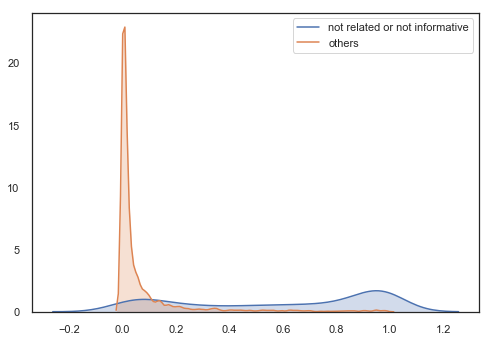

In [162]:
draw_distribution('not related or not informative')

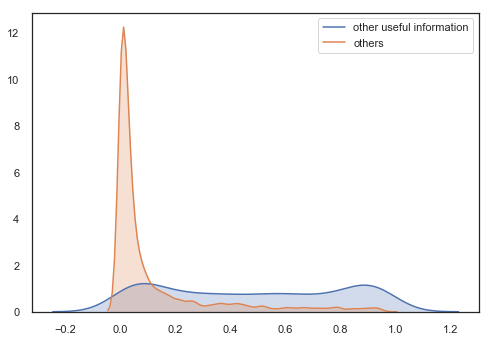

In [163]:
draw_distribution('other useful information')

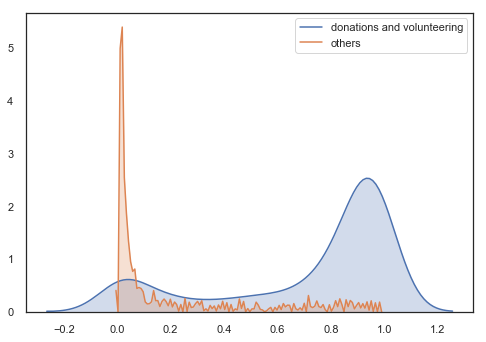

In [164]:
draw_distribution('donations and volunteering')

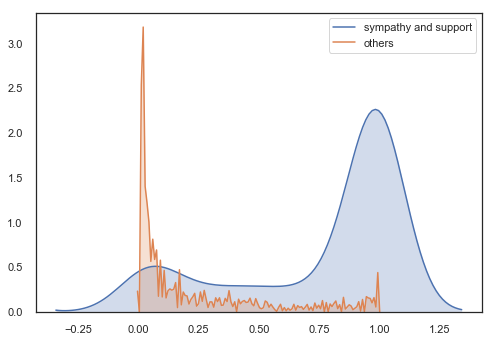

In [165]:
draw_distribution('sympathy and support')

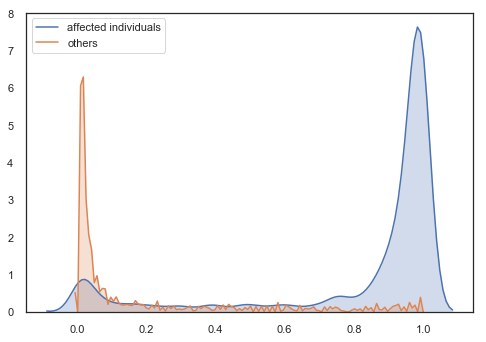

In [166]:
draw_distribution('affected individuals')

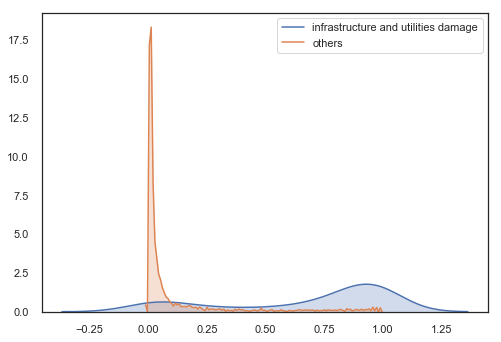

In [167]:
draw_distribution('infrastructure and utilities damage')

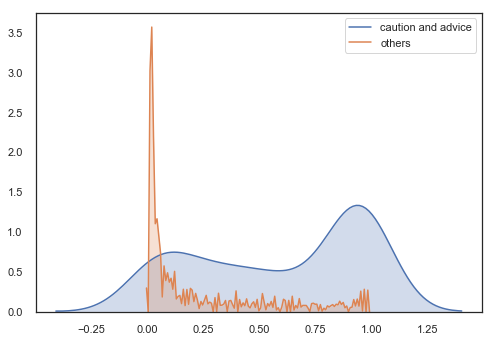

In [168]:
draw_distribution('caution and advice')

### Error rate by disaster type

In [178]:
error_allocated_events=dict(df_test.event_coarse[np.array(true_label)!=np.array(BERT_pred)].value_counts())
all_events=dict(df_test.event_coarse.value_counts())

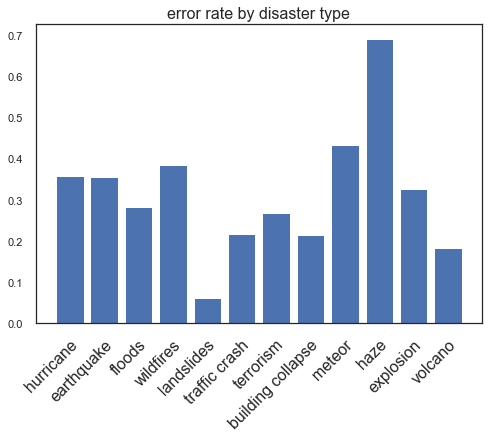

In [197]:
n_types=len(all_events)
fig, ax=plt.subplots()
disaster, count = zip(*[(i, error_allocated_events[i]/all_events[i]) for i in all_events.keys()])
ax.bar(disaster, count)
plt.title('error rate by disaster type', size=16)
plt.setp(ax.get_xticklabels(), size=16, rotation=45, ha="right",
             rotation_mode="anchor")
plt.show()

## Improvement

For classification, consider features or new tasks:

1. information source
2. timing and situation
3. other sub-classes derived from each class
4. RT and mentioning

For damage / disaster assessment:

1. Bayes rule to get posterior distribution: Use Tweets to reduce uncertainty of physical models. particle filtering...
2. (PGA, Tweets count) bivariate distribution
3. Resch paper